# Air passenger analysis using facebook prophet trial

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import chart_studio
chart_studio.tools.set_credentials_file(username='YeowTK', api_key='Oa7PqMYy0zhsCBwR8Aph')

In [3]:
import plotly.express as px
fig = px.histogram(airp, x='Operating Airline')
fig.show()

NameError: name 'airp' is not defined

In [7]:
airp = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [8]:
airp.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [9]:
KLM_passenger = airp[airp['Operating Airline'] == 'KLM Royal Dutch Airlines']

In [10]:
KLM_passenger['ds'] = pd.to_datetime(KLM_passenger['Activity Period'],format='%Y%m', errors='ignore')
KLM_passenger['y']= KLM_passenger['Adjusted Passenger Count']
KLM_passenger = KLM_passenger[KLM_passenger['Activity Type Code']=='Enplaned']
KLM_passenger.head(115)


train_dataset= pd.DataFrame()
train_dataset['ds'] = KLM_passenger['ds']
train_dataset['y']= KLM_passenger['y']
train_dataset.head(115)
# train_dataset=train_dataset.set_index('ds')

<ipython-input-10-92c202f6e81a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KLM_passenger['ds'] = pd.to_datetime(KLM_passenger['Activity Period'],format='%Y%m', errors='ignore')
<ipython-input-10-92c202f6e81a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KLM_passenger['y']= KLM_passenger['Adjusted Passenger Count']


,ds,y
56,2005-07-01,9587
172,2005-08-01,9881
290,2005-09-01,9513
407,2005-10-01,9113
525,2005-11-01,7110
...,...,...
12766,2014-09-01,11774
12876,2014-10-01,10433
12996,2014-11-01,5822
13118,2014-12-01,6447


In [12]:
future= m.make_future_dataframe(periods=14, freq='M')
future.tail(15)

,ds
128,2016-03-01
129,2016-03-31
130,2016-04-30
131,2016-05-31
132,2016-06-30
133,2016-07-31
134,2016-08-31
135,2016-09-30
136,2016-10-31
137,2016-11-30


In [11]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_dataset)

# future= prophet_basic.make_future_dataframe(periods=14, freq='M')
# future.tail(15)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


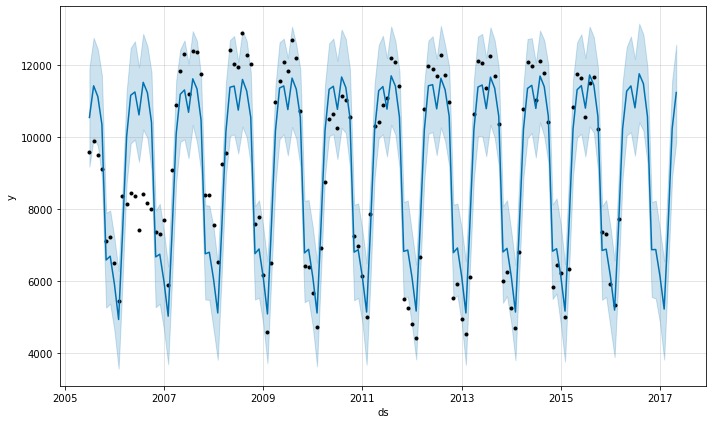

In [14]:
forecast=m.predict(future)
fig1 =m.plot(forecast)

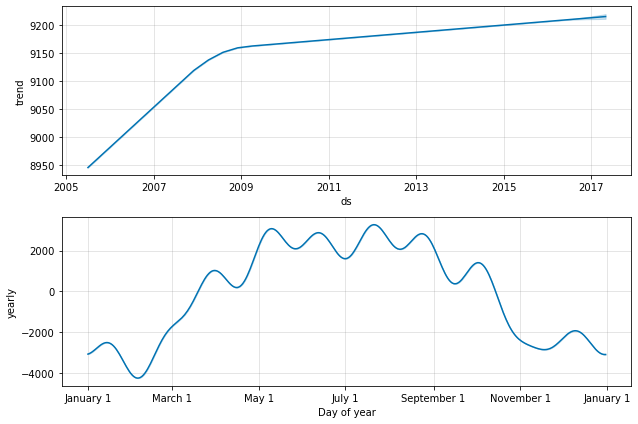

In [15]:
fig1 = m.plot_components(forecast)


In [18]:
m.changepoints


4     2005-11-01
8     2006-03-01
12    2006-07-01
16    2006-11-01
20    2007-03-01
24    2007-07-01
29    2007-12-01
33    2008-04-01
37    2008-08-01
41    2008-12-01
45    2009-04-01
49    2009-08-01
53    2009-12-01
57    2010-04-01
61    2010-08-01
65    2010-12-01
69    2011-04-01
73    2011-08-01
78    2012-01-01
82    2012-05-01
86    2012-09-01
90    2013-01-01
94    2013-05-01
98    2013-09-01
102   2014-01-01
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


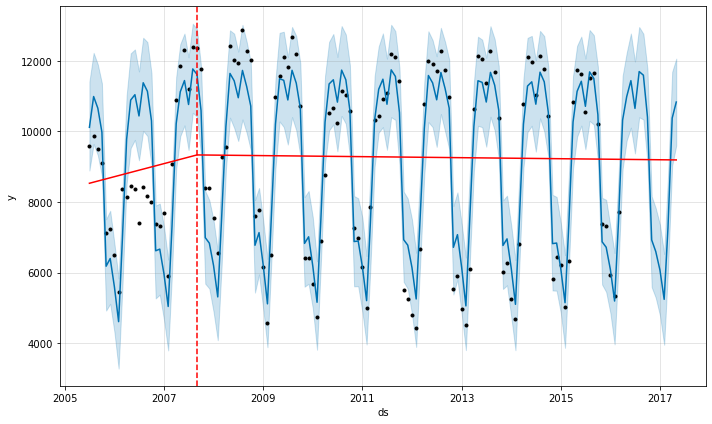

In [17]:
from fbprophet.plot import add_changepoints_to_plot

pro_change= Prophet(n_changepoints=4)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)